# Import Library yang Digunakan

In [68]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Data Wrangling

## Gathering Data

In [69]:
raw_data_path = os.path.join(os.getcwd(), '..', '..', 'data', 'raw_data.csv')

In [70]:
df = pd.read_csv(raw_data_path)
df.head()

,property_name,room_id,bedroom,bathroom,beds,guests,unit_id,wifi,tv,cable_tv,...,booking_check_out,booking_window,stay_duration_in_days,review_sentiment_score,rating,avg_rating,avg_review_sentiment_score,rating_count,booking_earned,average_daily_rate
0,Bingin Ombak,431874,1,1.0,1.0,2.0,UN1539,1,0,0,...,2023-01-06,81,4,NaN,4.0,4.3158,0.565051,19,5911197.97,1.477799e+06
1,Bingin Ombak,431875,1,1.0,1.0,2.0,UN1540,1,0,0,...,2023-01-06,81,4,NaN,4.0,4.0857,0.518720,35,5911197.97,1.477799e+06
2,Bingin Ombak,396658,1,1.0,1.0,2.0,UN1540,1,0,0,...,2023-01-06,81,4,NaN,4.0,4.0857,0.518720,35,5911197.97,1.477799e+06
3,Bingin Ombak,396427,1,2.0,1.0,2.0,UN1536,1,0,0,...,2023-01-06,81,4,NaN,4.0,4.5342,0.678392,164,5911197.97,1.477799e+06
4,Bingin Ombak,396427,1,2.0,1.0,2.0,UN0165,1,0,0,...,2023-01-06,81,4,NaN,4.0,4.5342,0.678392,164,5911197.97,1.477799e+06


In [71]:
print("Dataset Bukit Vista memiliki {} baris dan {} kolom".format(df.shape[0], df.shape[1]))

Dataset Bukit Vista memiliki 76075 baris dan 48 kolom


## Assesing Data

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76075 entries, 0 to 76074
Data columns (total 48 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   property_name               76075 non-null  object 
 1   room_id                     76075 non-null  int64  
 2   bedroom                     76075 non-null  int64  
 3   bathroom                    75985 non-null  float64
 4   beds                        75985 non-null  float64
 5   guests                      75985 non-null  float64
 6   unit_id                     76075 non-null  object 
 7   wifi                        76075 non-null  int64  
 8   tv                          76075 non-null  int64  
 9   cable_tv                    76075 non-null  int64  
 10  ac                          76075 non-null  int64  
 11  workspace                   76075 non-null  int64  
 12  essentials                  76075 non-null  int64  
 13  hot_water                   760

Disini, kami melihat info terkait nama kolom pada dataset beserta tipe data dari masing-masing kolom. Terlihat bahwa terdapat beberapa kolom yang memiliki tipe data yang salah diantaranya:
1. bathroom
2. beds
3. guests
4. booking_received_timestamp
5. booking_check_in
6. booking_check_out

In [73]:
print('Jumlah missing value pada tiap kolom:')
df.isnull().sum()

Jumlah missing value pada tiap kolom:


property_name                     0
room_id                           0
bedroom                           0
bathroom                         90
beds                             90
guests                           90
unit_id                           0
wifi                              0
tv                                0
cable_tv                          0
ac                                0
workspace                         0
essentials                        0
hot_water                         0
parking                           0
pool                              0
gym                               0
private_entrance                  0
luggage_drop_off                  0
hanger                            0
lock                              0
linens                            0
garden                            0
balcony                           0
kitchen                           0
breakfast                         0
heating                           0
washer                      

Disini, kami melihat bahwa terdapat beberapa kolom yang memiliki missing value diantaranya:
1. bathroom
2. beds
3. guests
4. lat
5. lng
6. distance_to_coastline
7. review_sentiment_score
8. rating
9. avg_review_sentiment_score

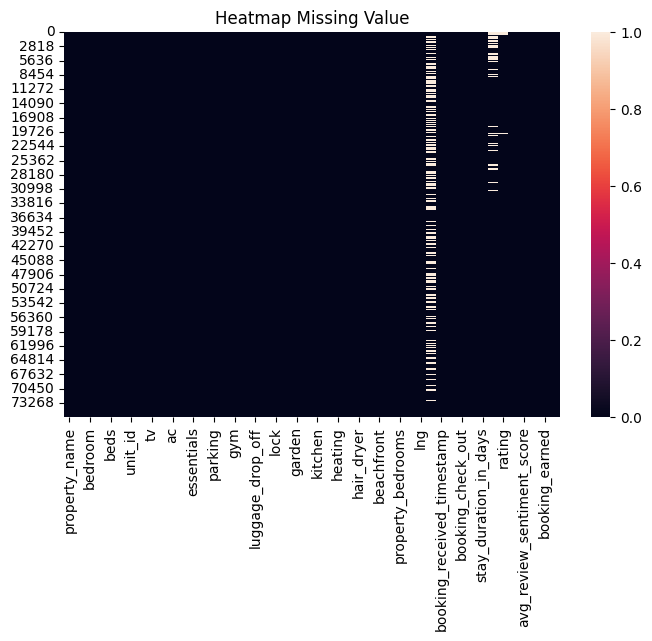

In [74]:
plt.figure(figsize=(8, 5))
sns.heatmap(df.isnull())
plt.title('Heatmap Missing Value')
plt.show()

Disini, kami melakukan visualisasi terkait missing value untuk mendapatkan gambaran secara visual.

In [75]:
df.describe()

,room_id,bedroom,bathroom,beds,guests,wifi,tv,cable_tv,ac,workspace,...,distance_to_coastline,booking_window,stay_duration_in_days,review_sentiment_score,rating,avg_rating,avg_review_sentiment_score,rating_count,booking_earned,average_daily_rate
count,76075.000000,76075.000000,75985.000000,75985.000000,75985.000000,76075.000000,76075.000000,76075.000000,76075.000000,76075.000000,...,44979.000000,76075.000000,76075.000000,70898.000000,75304.000000,76075.000000,76044.000000,76075.000000,7.607500e+04,7.607500e+04
mean,402901.126638,1.035925,1.056156,1.044180,2.088596,0.978285,0.520368,0.087979,0.974052,0.896799,...,672.549622,28.205665,3.545633,0.633039,4.407960,4.408835,0.641177,100.414670,2.310783e+06,6.817067e+05
std,13585.007827,0.309620,0.387634,0.321762,0.527981,0.145754,0.499588,0.283266,0.158981,0.304223,...,1419.634557,40.953705,3.850207,0.486034,0.940017,0.270077,0.155233,70.560508,3.002804e+06,6.349918e+05
min,378260.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,12.924400,-1.000000,1.000000,-1.000000,1.000000,3.000000,-0.600000,1.000000,-2.590644e+06,-2.590644e+06
25%,395988.000000,1.000000,1.000000,1.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,65.860300,2.000000,2.000000,0.600000,4.000000,4.246600,0.531918,45.000000,8.601060e+05,3.825765e+05
50%,397690.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,0.000000,1.000000,1.000000,...,402.195000,12.000000,3.000000,0.900000,5.000000,4.386000,0.658800,89.000000,1.470298e+06,5.035983e+05
75%,399830.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,0.000000,1.000000,1.000000,...,1030.110000,36.000000,4.000000,0.900000,5.000000,4.583700,0.756838,156.000000,2.700537e+06,7.849588e+05
max,475730.000000,5.000000,5.000000,5.000000,9.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,14402.100000,333.000000,91.000000,1.000000,5.000000,5.000000,0.984097,274.000000,6.137459e+07,1.003399e+07


Disini, kami melihat statistik dari dataframe dengan kolom berisi data numerik.

In [76]:
for column_name in df.columns:
    # Get distinct values for each column
    distinct_values = df[column_name].unique()
    
    # Print column name and distinct values
    print("Column Name:", column_name)
    print("Distinct Values:", distinct_values, "\n")

Column Name: property_name
Distinct Values: ['Bingin Ombak' 'Double A Guest' 'ME Villa Batu Mejan' 'Kembang Kuning'
 'The Gong' 'Ba Bar Cottages' 'Villa Damuh' 'Pondok Kita'
 'Uluwatu Kayana Bungalows' 'Pondok Lulik' 'Kubu Nyang Nyang'
 "Didi's Place" 'NDBV Lot 6' 'Pondok Nini Ubud' 'Boga Segara'
 'Goa Giri Hill Bungalow' 'Despacito Loft & Lounge'
 'Warisan Homestay Nusa Penida' 'Kencana homestay'
 'WOODEN PURI Guesthouse' 'Kamisama Homestay' 'Puri Kelapa'
 'Villa Bahagia' 'Uluwatu Village House' 'Raka & Rai Guesthouse'
 'Sunrise House' 'Comeback Guesthouse' 'NH Residence'
 'Villa Rumah Pertama' 'De Kutuh Villa' 'NDBV Lot 3' 'Kubu Mesari'
 'Teges Asri' 'Bingin Surf Left' "D''House of Gembala" 'Omah Gerjen 29'
 'Rumah Budi Susanto' 'Pondok Bagus Guesthouse' 'Villa Arindra'
 'Villa Kyl 2BR' 'Asri Village' 'Villa Tortoise' 'Amazon Guesthouse'
 'Pondok Nini Villa' 'Pondok Chesia' 'Dream Breeze Village'
 'Kinton Guesthouse' 'Breeze Hidden Village' 'Villa Malindo'
 'Rumah Taman Kutuh Guestho

Disini, kami melihat distinct value pada setiap kolom.

In [77]:
print("Jumlah data duplikat pada dataframe adalah {}".format(df.duplicated().sum()))

Jumlah data duplikat pada dataframe adalah 7933


Pada dataset Bukit Vista, memiliki jumlah data duplikat sebanyak 8.043.

## Cleaning Data

In [78]:
# List of column names to drop
columns_to_drop = ['unit_id', 
                   'essentials',
                   'property_bedrooms',
                   'booking_received_timestamp',
                   'booking_check_in',
                   'booking_check_out',
                   'distance_to_coastline',
                   'review_sentiment_score',
                   'rating',
                   'booking_earned']

# Drop the specified columns
df.drop(columns=columns_to_drop, inplace=True)

Kami melakukan drop pada beberapa kolom yang ada pada dataframe dengan alasan sebagai berikut:
1. unit_id: melakukan prediksi hanya menggunakan property name dan room_id 
2. essentials: valuenya hanya angka 1
5. property_bedrooms: melakukan prediksi hanya menggunakan property name dan room_id
6. booking_received_timestamp: telah digunakan untuk melakukan feature engineering bernama kolom booking_window
7. booking_check_in: telah digunakan untuk melakukan feature engineering bernama kolom booking_window dan stay_duration_in_days
8. booking_check_out: telah digunakan untuk melakukan feature engineering bernama kolom stay_duration_in_days 
9. booking_earned: telah digunakan untuk melakukan feature engineering bernama kolom average_daily_rate

In [79]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')

columns_to_impute = ['bathroom', 
                     'beds', 
                     'guests',
                     'lat',
                     'lng',
                     'avg_review_sentiment_score']

# Perform imputation only on selected columns
imputed_values = imputer.fit_transform(df[columns_to_impute])

# Create a DataFrame from imputed values
imputed_df = pd.DataFrame(imputed_values, columns=columns_to_impute)

# Replace original columns with imputed values
df[columns_to_impute] = imputed_df

Kami melakukan imputasi data menggunakan fancy impute atau MICE. MICE adalah Multiple Imputation by Chained Equations. Alasan kami menggunakan MICE dikarenakan missing value pada dataset terlalu banyak.

In [80]:
# Convert float columns to int
df['bathroom'] = df['bathroom'].astype(int)
df['beds'] = df['beds'].astype(int)
df['guests'] = df['guests'].astype(int)

# Convert object columns to datetime
#df['booking_received_timestamp'] = pd.to_datetime(df['booking_received_timestamp'])
# df['booking_check_in'] = pd.to_datetime(df['booking_check_in'])
# df['booking_check_out'] = pd.to_datetime(df['booking_check_out'])

Berdasarkan info yang telah kami peroleh, maka kami mengubah tipe data pada beberapa kolom. 

In [81]:
df.drop_duplicates(inplace=True)
print("Jumlah data duplikat pada dataframe adalah {}".format(df.duplicated().sum()))

Jumlah data duplikat pada dataframe adalah 0


Kami menghapus data duplikat pada dataframe. Dapat dilihat bahwa jumlah data duplikat saat ini berjumlah 0 baris.

In [82]:
negative_average_daily_rate = df[df['average_daily_rate'] < 0]

negative_average_daily_rate.head()

,property_name,room_id,bedroom,bathroom,beds,guests,wifi,tv,cable_tv,ac,...,beachfront,building_staff,lat,lng,booking_window,stay_duration_in_days,avg_rating,avg_review_sentiment_score,rating_count,average_daily_rate
1869,Villa Damuh,398529,1,1,1,2,1,1,0,0,...,0,0,-8.458553,115.279939,4,2,4.1250,0.656021,25,-463856.615
1870,Villa Damuh,398529,1,1,1,2,1,1,0,0,...,0,0,-8.458553,115.279939,4,2,4.1250,0.656021,25,-463856.615
2501,ME Villa Batu Mejan,431114,2,2,2,4,1,1,0,1,...,0,1,-8.652147,115.132308,6,1,4.3846,0.658800,54,-20079.500
2502,ME Villa Batu Mejan,399295,2,2,2,4,1,1,0,1,...,0,1,-8.652147,115.132308,6,1,4.3846,0.658800,54,-20079.500
2503,ME Villa Batu Mejan,398520,1,1,1,2,1,1,0,1,...,0,1,-8.652147,115.132308,6,1,4.4406,0.640672,145,-20079.500


Kami menemukan bahwa terdapat beberapa baris yang memiliki nilai average_daily_rate negatif. Average_daily_rate merupakan jumlah uang yang didapatkan dalam penyewaan properti per-hari. Oleh karena itu, tidak memungkinkan bahwa average_daily_rate tersebut bernilai negatif.

In [83]:
# Directly changing negative values to positive in the original DataFrame
df.loc[df['average_daily_rate'] < 0, 'average_daily_rate'] = df['average_daily_rate'].abs()

print("Jumlah row dengan negative average daily rate saat ini :", df[df['average_daily_rate'] < 0].shape[0])

Jumlah row dengan negative average daily rate saat ini : 0


Sehingga, kami mengubah beberapa baris yang memiliki nilai average_daily_rate yang semula negatif menjadi positif.

In [84]:
zero_booking_earned = df[df['average_daily_rate'] == 0]

zero_booking_earned.head()

,property_name,room_id,bedroom,bathroom,beds,guests,wifi,tv,cable_tv,ac,...,beachfront,building_staff,lat,lng,booking_window,stay_duration_in_days,avg_rating,avg_review_sentiment_score,rating_count,average_daily_rate
68,Bingin Ombak,431874,1,1,1,2,1,0,0,1,...,1,0,-8.805646,115.113378,3,7,4.3158,0.565051,19,0.0
69,Bingin Ombak,431875,1,1,1,2,1,0,0,1,...,1,0,-8.805646,115.113378,3,7,4.0857,0.518720,35,0.0
70,Bingin Ombak,396658,1,1,1,2,1,0,0,1,...,1,0,-8.805646,115.113378,3,7,4.0857,0.518720,35,0.0
71,Bingin Ombak,396427,1,2,1,2,1,0,0,0,...,1,0,-8.805646,115.113378,3,7,4.5342,0.678392,164,0.0
72,Bingin Ombak,396427,1,2,1,2,1,0,0,0,...,1,0,-8.805646,115.113378,3,7,4.5342,0.678392,164,0.0


Kami menemukan bahwa terdapat beberapa baris yang memiliki nilai average_daily_rate nol. Average_daily_rate merupakan jumlah uang yang didapatkan dalam penyewaan properti per-hari. Oleh karena itu, tidak memungkinkan bahwa average_daily_rate tersebut bernilai nol.

In [85]:
df = df[df['average_daily_rate'] != 0]

In [86]:
print("Jumlah row dengan nol booking earned saat ini :", df[df['average_daily_rate'] == 0].shape[0])

Jumlah row dengan nol booking earned saat ini : 0


Dapat dilihat bahwa jumlah row dengan nol booking earned saat ini berjumlah nol.

In [87]:
negative_booking_window = df[df['booking_window'] < 0]

negative_booking_window.shape

(5, 38)

Kami melakukan pengecekan baris booking_window yang bernilai negatif. Terlihat bahwa baris booking_window yang bernilai negatif sebanyak 5 baris.

In [88]:
df = df[df['booking_window'] >= 0]

In [89]:
print("Jumlah row dengan negatif booking window saat ini :", df[df['booking_window'] < 0].shape[0])

Jumlah row dengan negatif booking window saat ini : 0


Kami menghapus baris pada dataframe yang memiliki nilai booking_window negatif.

In [90]:
print("Dataset Bukit Vista setelah preprocessing memiliki {} baris dan {} kolom".format(df.shape[0], df.shape[1]))

Dataset Bukit Vista setelah preprocessing memiliki 56683 baris dan 38 kolom


Setelah dilakukan preprocessing, dataset Bukit Vista saat ini memiliki jumlah baris sebanyak 58.916 dan jumlah kolom sebanyak 40.

## Exploratory Data Analysis

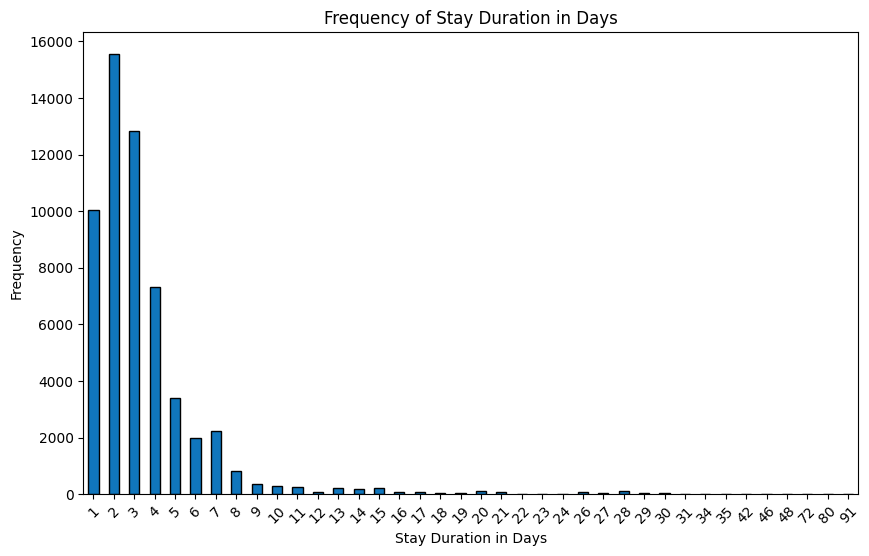

In [91]:
# cari stay in day biasanya berapa
stay_duration_count = df['stay_duration_in_days'].value_counts().sort_index()

# buat plotnya
plt.figure(figsize=(10, 6))
stay_duration_count.plot(kind='bar', color='#1076bc', edgecolor='black')
plt.xlabel('Stay Duration in Days')
plt.ylabel('Frequency')
plt.title('Frequency of Stay Duration in Days')
plt.xticks(rotation=45)
plt.show()

Disini kami mencari tahu pada umumnya, seberapa lama tamu menginap pada properti-properti yang dikelola oleh Bukit Vista. Dapat dilihat bahwa kebanyakan tamu menginap selama 2 hari.

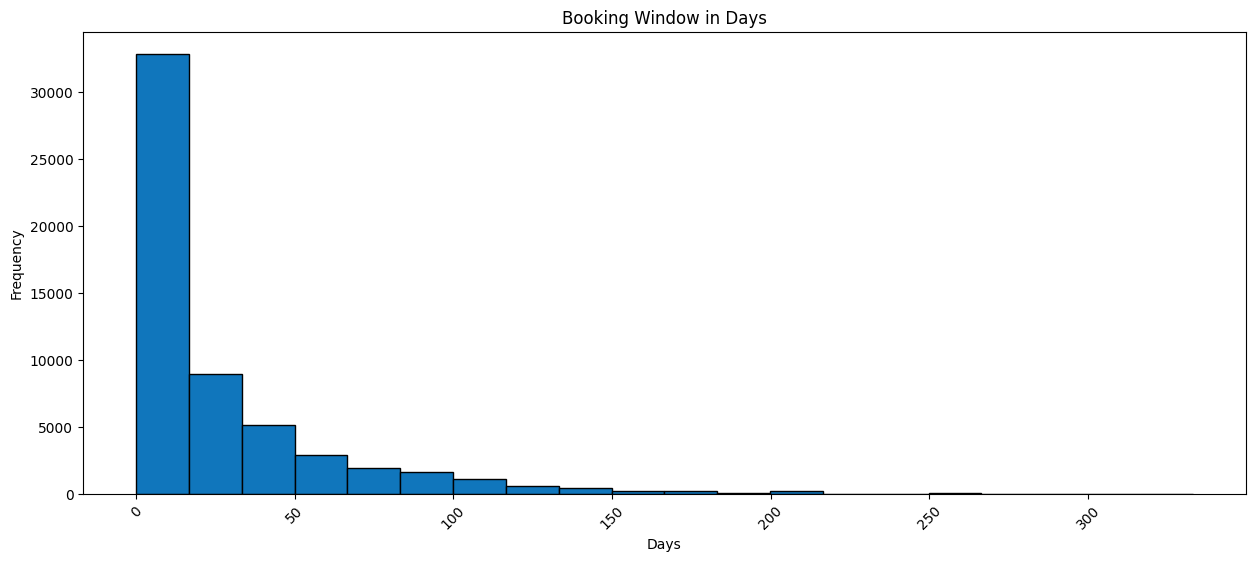

In [109]:
 # buat plotnya
plt.figure(figsize=(15, 6))
plt.hist(df['booking_window'], bins=20, color='#1076bc', edgecolor='black')
plt.xlabel('Days')
plt.ylabel('Frequency')
plt.title('Booking Window in Days')
plt.xticks(rotation=45)
plt.show()

Disini, kami mencari tahu berapa frekuensi booking window dengan histogram yang memiliki 20 bins. Dapat dilihat bahwa data condong ke kanan.

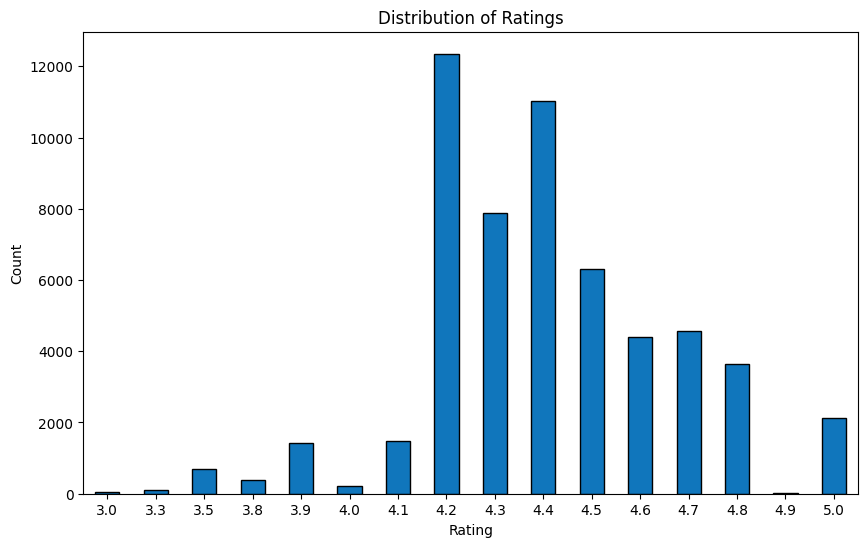

In [93]:
# Create a new DataFrame with the rounded rating column
df_rounded = df.copy()
df_rounded['rating_rounded'] = df['avg_rating'].round(1)

# Count the occurrences of each rounded rating
rating_counts = df_rounded['rating_rounded'].value_counts().sort_index()

# Plot the bar chart
plt.figure(figsize=(10, 6))
rating_counts.plot(kind='bar', color='#1076bc', edgecolor='black')

# Set labels and title
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Distribution of Ratings')
plt.xticks(rotation=0)  # Ensure x-axis labels are horizontal

# Show the plot
plt.show()

Disini, kami mencari tahu sebaran dari kolom rating. Dapat dilihat bahwa kebanyakan tamu menilai properti-properti yang dikelola oleh Bukit Vista dengan nilai 5.

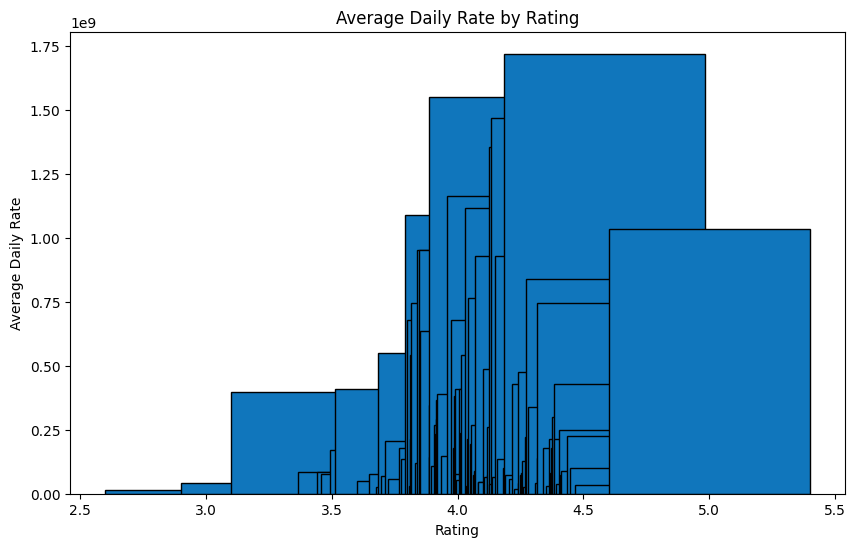

In [94]:
# Menggambarkan korelasi antara penilaian properti dengan pemasukkan properti
rating_booking = df.groupby('avg_rating')['average_daily_rate'].sum().reset_index()

rating_booking = rating_booking.sort_values(by='avg_rating')

plt.figure(figsize=(10, 6))
plt.bar(rating_booking['avg_rating'], rating_booking['average_daily_rate'], color='#1076bc', edgecolor='black')
plt.xlabel('Rating')
plt.ylabel('Average Daily Rate')
plt.title('Average Daily Rate by Rating')
plt.show()

Disini, kami membuat diagram batang untuk mencari tahu apakah ada relasi antara penilaian properti dengan rata-rata uang yang didapat oleh properti tersebut per-hari. Dapat dilihat bahwa terdapat korelasi antara penilaian properti dengan rata-rata uang yang didapat oleh properti tersebut per-hari.

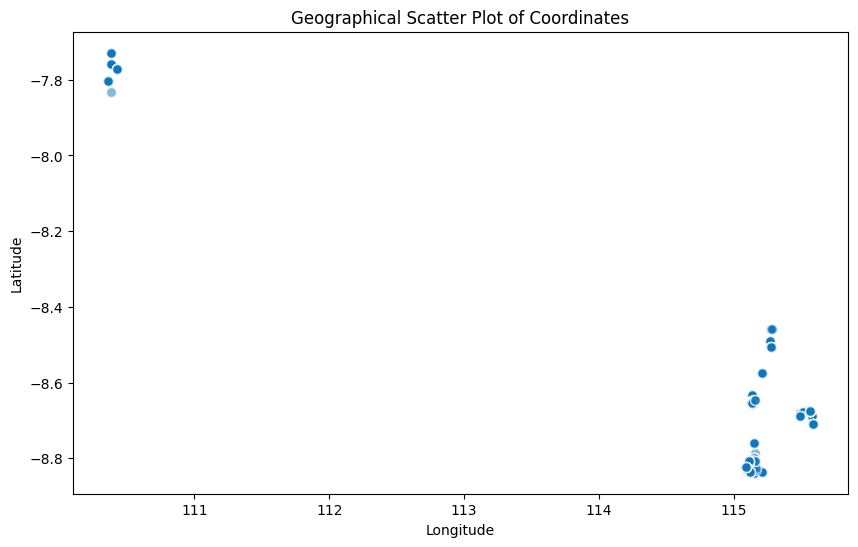

In [95]:
# visualisasi lat dan lng
plt.figure(figsize=(10, 6))
plt.scatter(df['lng'], df['lat'], c='#1076bc', alpha=0.5, edgecolors='w', s=50)

# Set labels and title
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Geographical Scatter Plot of Coordinates')

# Show the plot
plt.show()

Disini kami mencoba untuk memvisualisasikan koordinat yang ada pada kolom "lat" dan "lng".

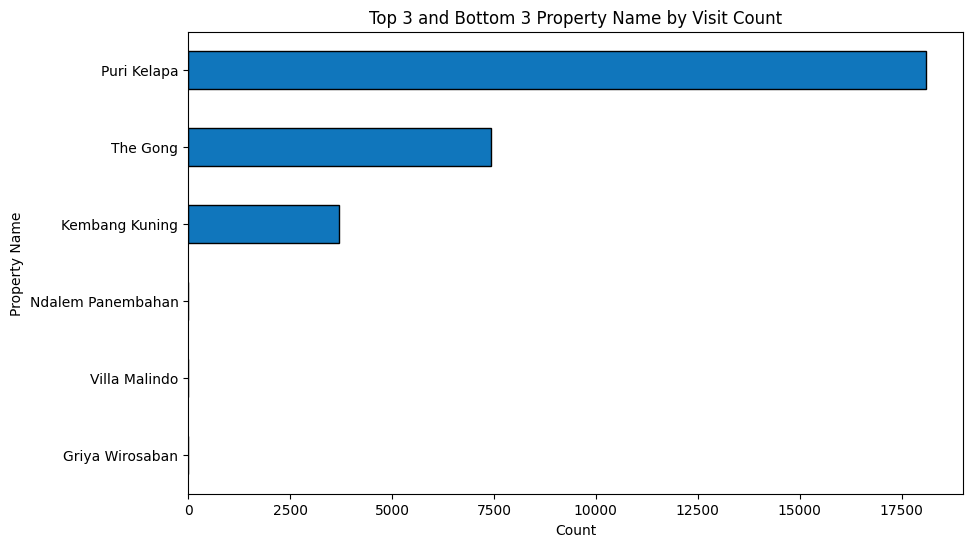

In [96]:
# Count the occurrences of each property name and sort them
type_counts = df['property_name'].value_counts().sort_values()

# Get the top 3 and bottom 3 room types
top_3 = type_counts[-3:]
bottom_3 = type_counts[:3]

# Concatenate top 3 and bottom 3
top_bottom_3 = pd.concat([bottom_3, top_3])

# Plot the bar chart
plt.figure(figsize=(10, 6))
top_bottom_3.plot(kind='barh', color='#1076bc', edgecolor='black')  # Use horizontal bar chart

# Set labels and title
plt.xlabel('Count')
plt.ylabel('Property Name')
plt.title('Top 3 and Bottom 3 Property Name by Visit Count')

# Show the plot
plt.show()

Disini kami memvisualisasikan perbedaan jumlah pengunjung berdasarkan nama ruangan, dan menampilkan hanya berdasarkan 3 terbanyak dan 3 terendah.

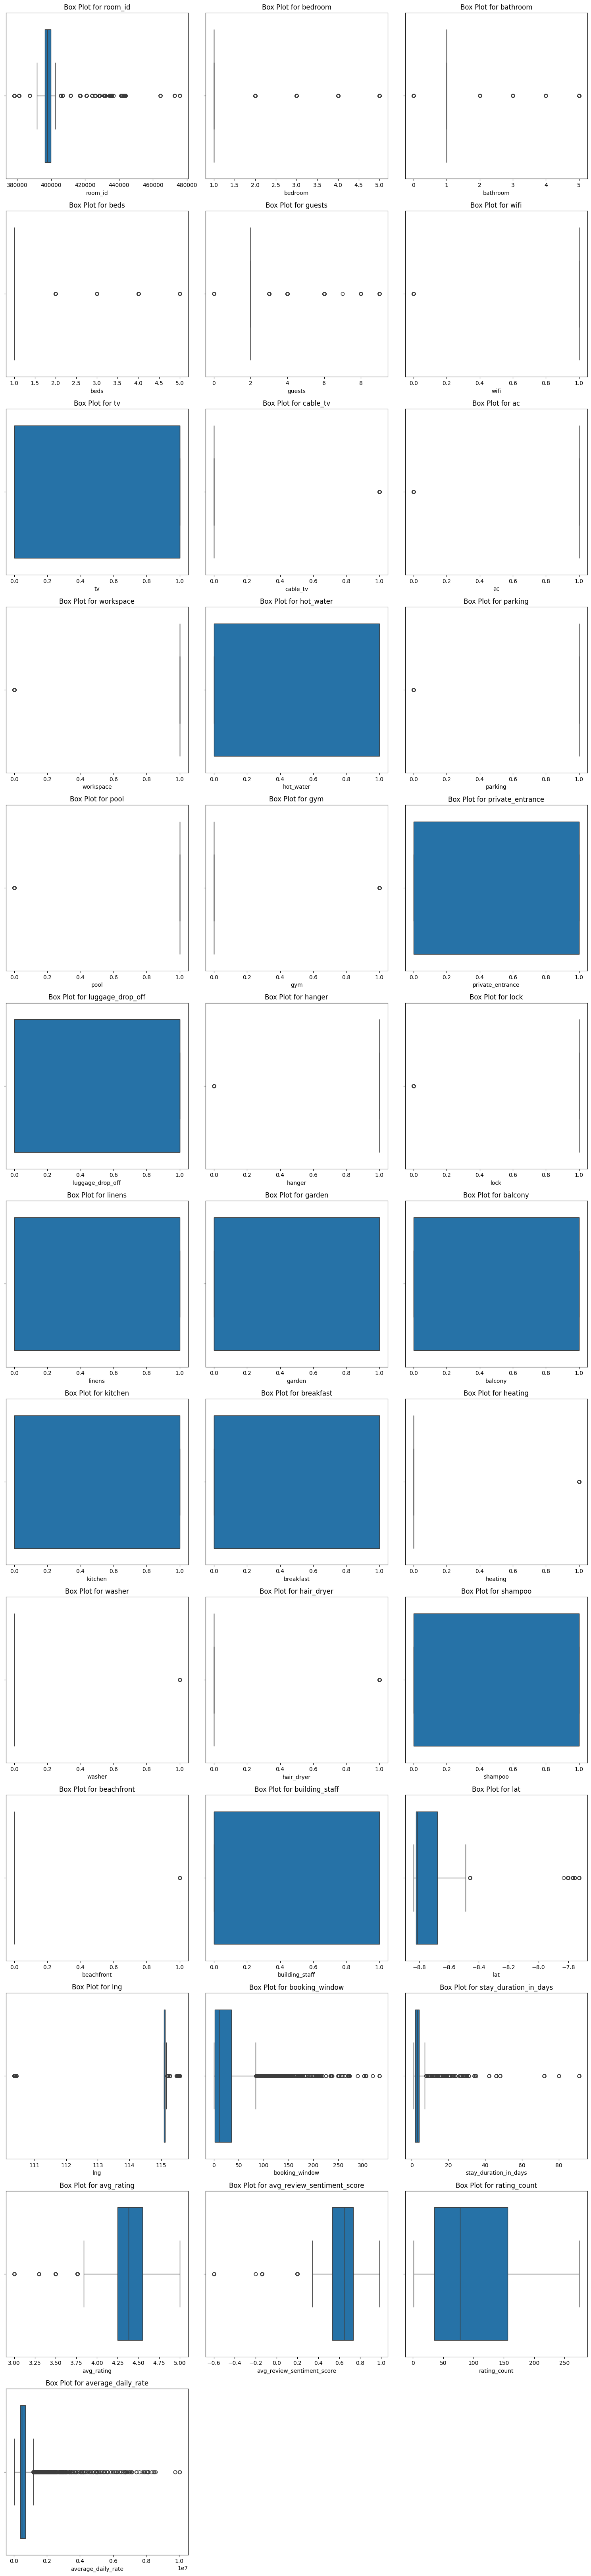

In [97]:
num_columns = len(df.columns)
num_rows = (num_columns + 2) // 3

plt.figure(figsize=(15, 5 * num_rows))

for i, column in enumerate(df.select_dtypes(include=['number'])):
    plt.subplot(num_rows, 3, i + 1)
    sns.boxplot(x=df[column], color="#1076bc")
    plt.title(f'Box Plot for {column}')

plt.tight_layout()
plt.show()

Disini, kami melakukan visualisasi menggunakan boxplot untuk mencari outlier.

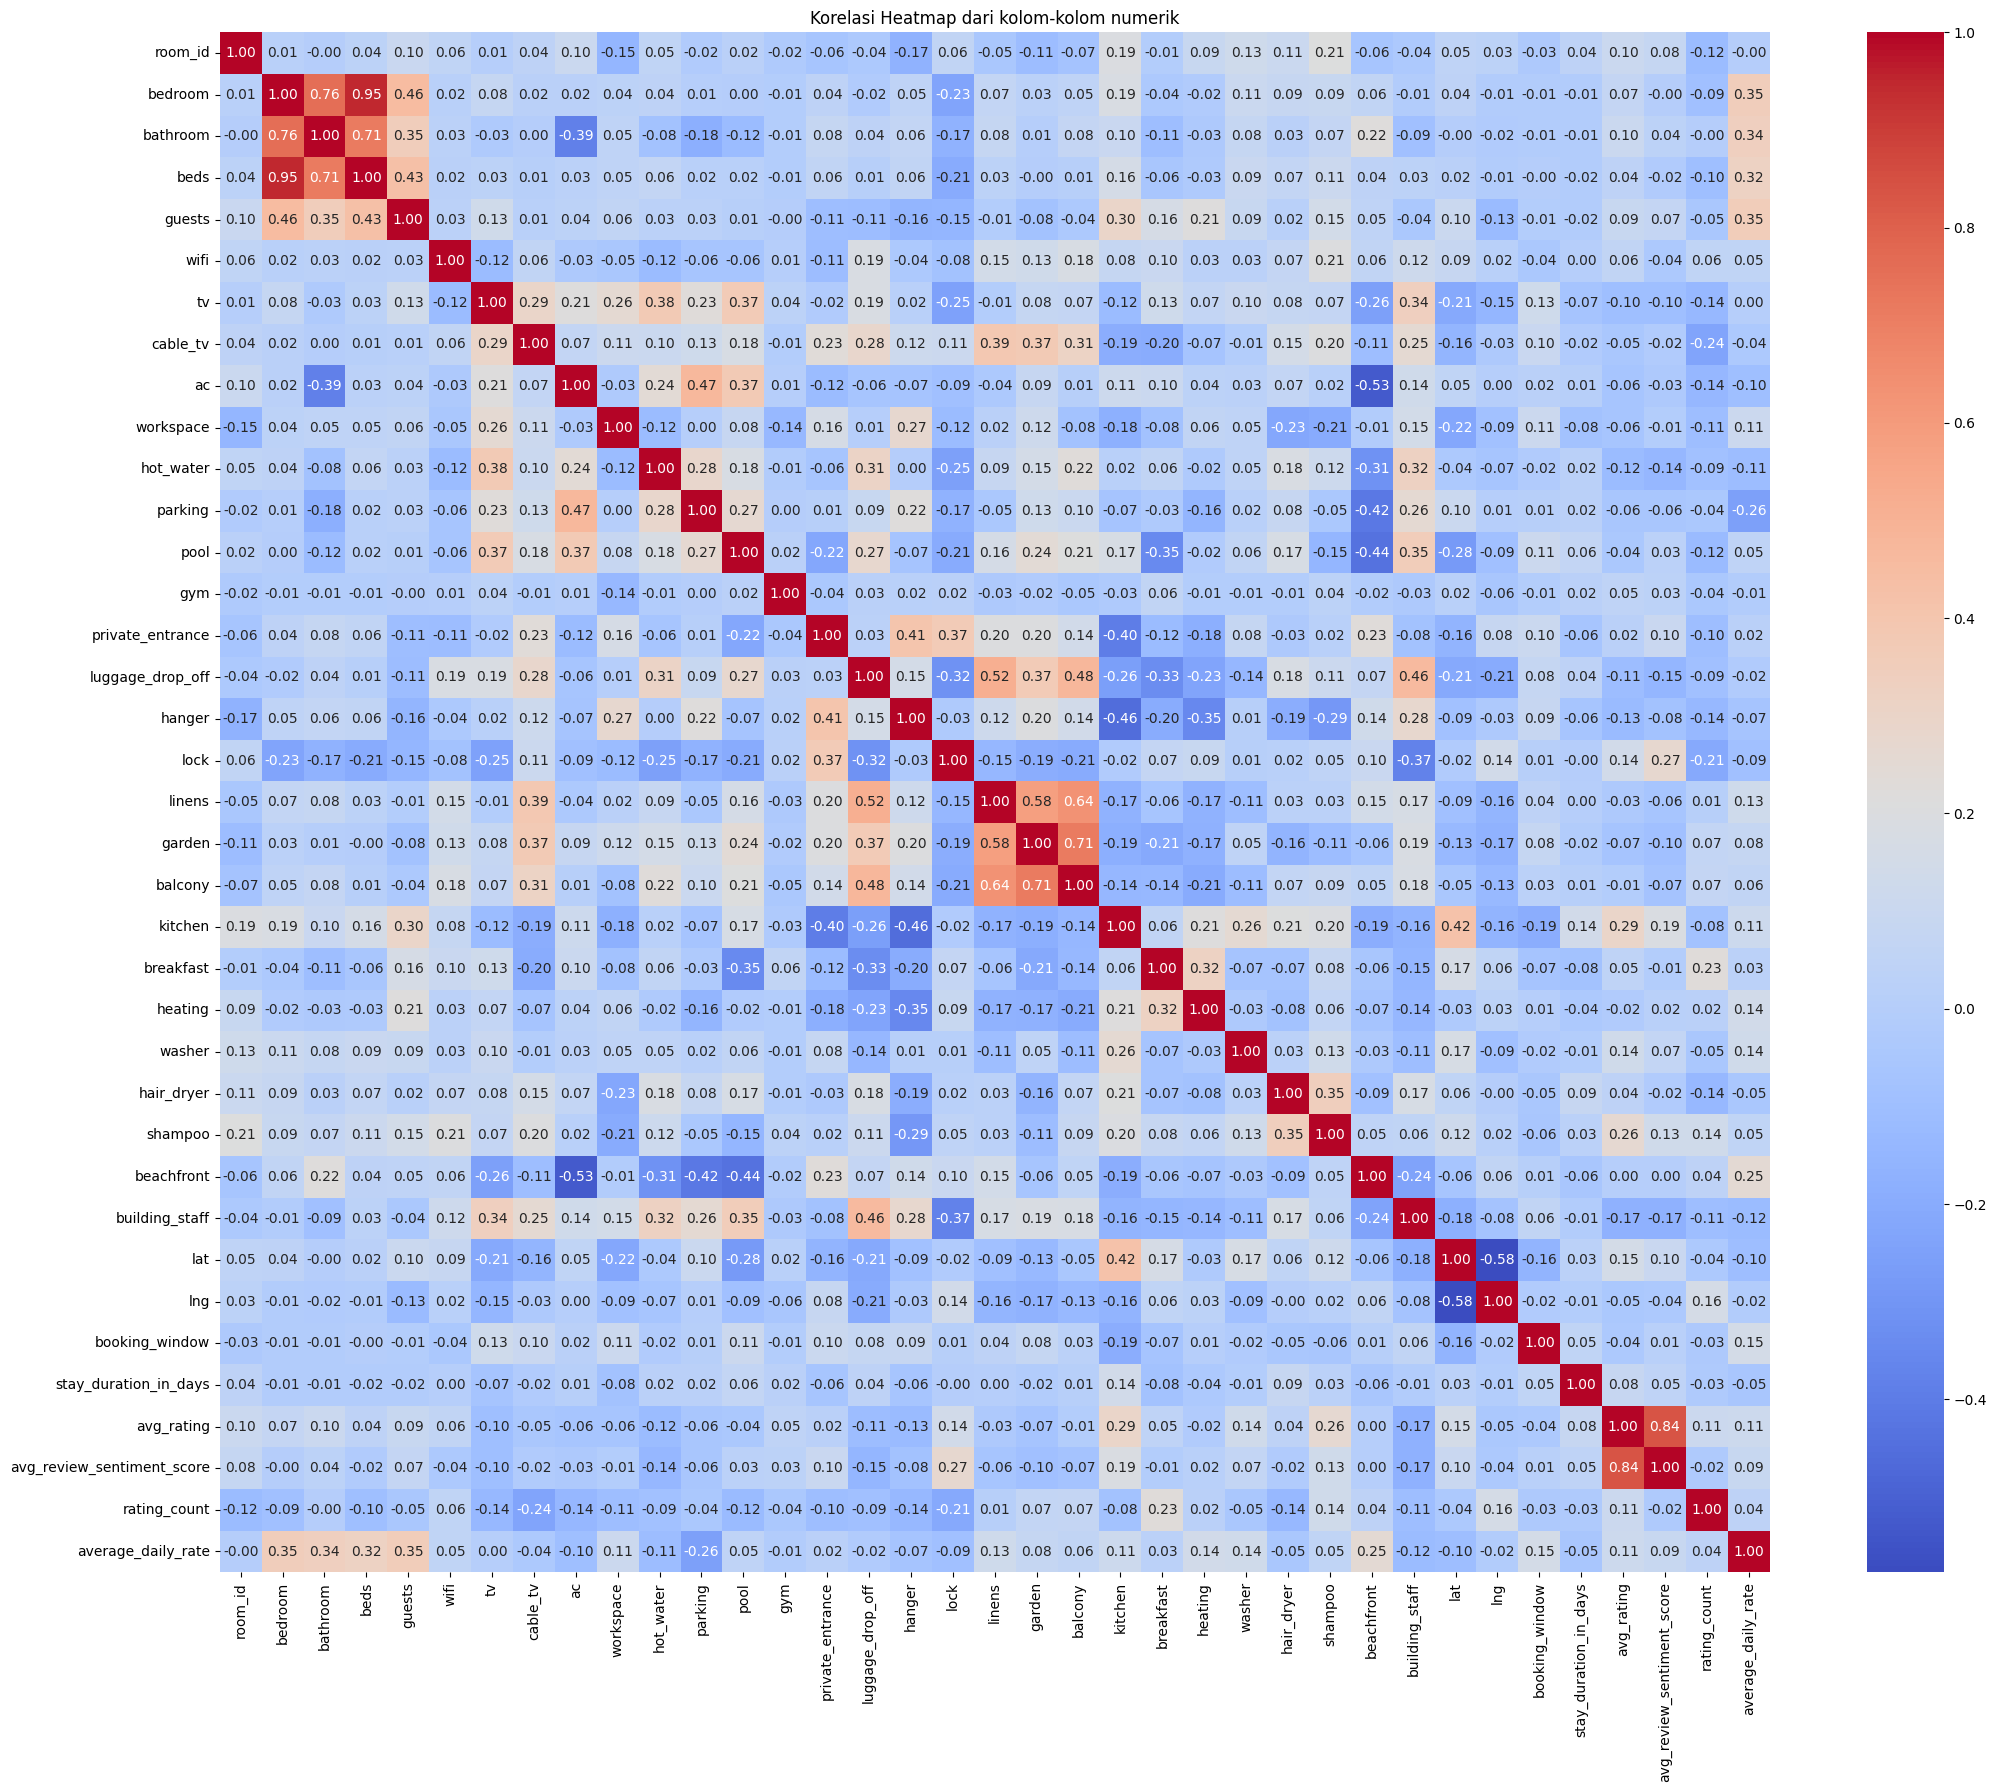

In [98]:
numeric_columns = df.select_dtypes(include=['number'])

plt.figure(figsize=(25,20))
sns.heatmap(numeric_columns.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Korelasi Heatmap dari kolom-kolom numerik')
plt.show()

Disini, kami memvisualisasikan korelasi antara semua kolom numerik, dan diberi warna berdasarkan tingkat korelasinya menggunakan heatmap.

## Save Data into CSV

In [99]:
# cara mendownload data hasil preprocessing :
path = os.path.join(os.path.dirname(raw_data_path), 'preprocessed_data.csv')
df.to_csv('preprocessed_data.csv', index=False)

Kami menyimpan data hasil preprocessing dengan nama preprocessed_data.csv